In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [109]:
#load the csv file and convert to np.array
pd_shap = pd.read_csv('all_mean_shap.csv',
                      header=0,
                      index_col=0)

all_shap = pd.DataFrame.to_numpy(pd_shap)

#drop cols that contain all 0's
sum_rows = np.sum(all_shap[:,1:], axis=1)
used_cols = np.where(sum_rows != 0)[0]

all_shap = all_shap[used_cols]
#print(pd.DataFrame(all_shap))

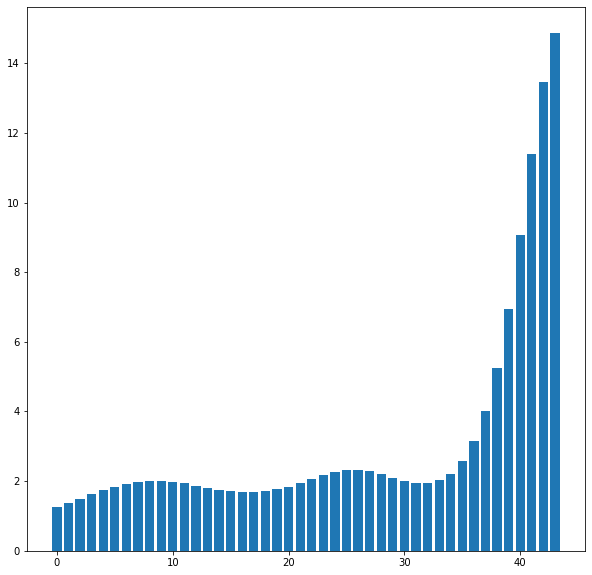

In [182]:
#plot of the mean output value for all channels
pd_yvals = pd.read_csv('y_val.csv', 
                        header=None,
                        index_col=None)

np_yvals = pd.DataFrame.to_numpy(pd_yvals)
sum_yvals = np.sum(np_yvals, axis=0)
counts = np.count_nonzero(np_yvals, axis=0)
avg_coly = sum_yvals/counts


plt.bar(np.arange(0,44), avg_coly)
plt.rcParams["figure.figsize"]=[10,10]

In [161]:
#this is the sum of the shap values for all channels
per_ch_impact = np.sum(all_shap[:,1:], axis=0)
normalised_ch_shap = per_ch_impact/np.linalg.norm(per_ch_impact)


In [30]:
#list of channel names
ch_names = np.arange(44).tolist()
freqs = np.arange(191.6, 195.9, 0.1).tolist()
for x in range(len(ch_names)):
  ch_names[x] = "Ch %.0f (%.1f)" % (ch_names[x], freqs[x])

Text(0.5, 0, 'Channel Number')

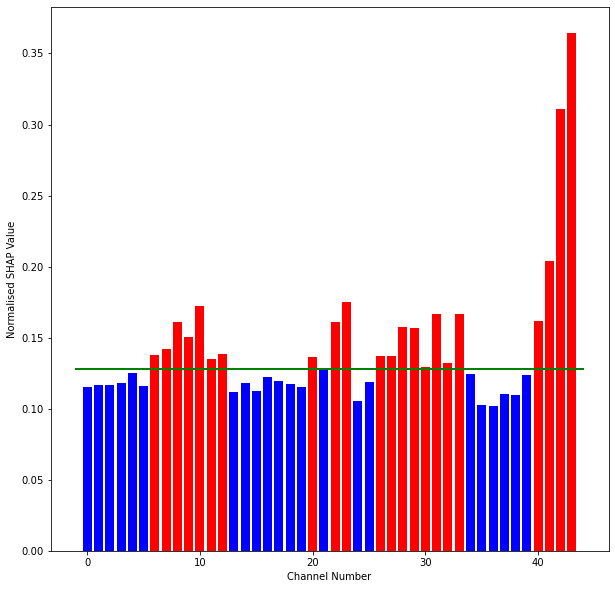

In [183]:
avg = np.median(normalised_ch_shap)


colours = []
for value in normalised_ch_shap:
    if value > avg:
        colours.append('r')
    else:
        colours.append('b')



plt.bar(np.arange(0,44), normalised_ch_shap, color=colours)
plt.plot([-1, 44], [avg, avg],color='green',linewidth=2)
plt.ylabel('Normalised SHAP Value')
plt.xlabel('Channel Number')


Text(0.5, 1.0, 'Occurances in Top 10 SHAP Values')

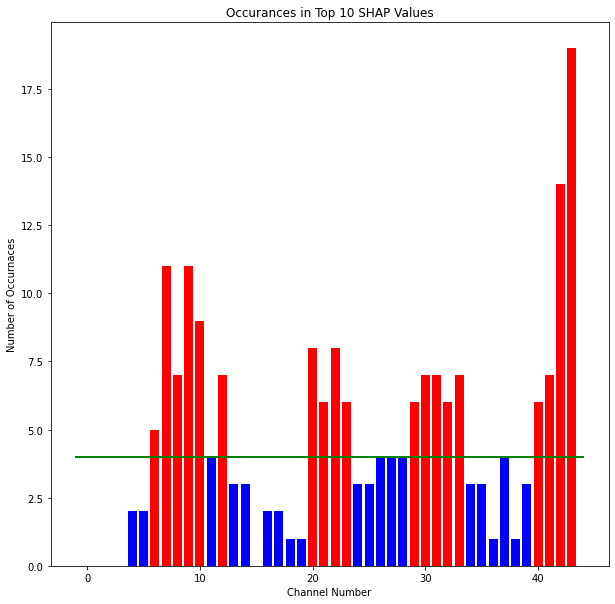

In [186]:
#plotting the number of occurnaces of each channel as one of the 
shap_cols = all_shap[:,1:]
args = np.argsort(-shap_cols)[:,0:10]
count = np.bincount(args.flatten())
med_val = np.median(count)

colours = []
for value in count:
    if value > med_val:
        colours.append('r')
    else:
        colours.append('b')


plt.bar(np.arange(0,44), count, color=colours)
plt.plot([-1, 44], [med_val, med_val],color='green',linewidth=2)
plt.xlabel('Channel Number')
plt.ylabel('Number of Occurnaces')
plt.title('Occurances in Top 10 SHAP Values')

